In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt




In [45]:
class NelsonSiegelSvensson:
    def __init__(self, df, n_max) -> None:
        self.df = df
        self.n_max = n_max  
          
    @staticmethod
    def nelson_siegel(n, tau1, beta0, beta1, beta2, beta3: float = 0, tau2 : float = 0):
        part1 = beta0
        part2 = beta1 * (1 - math.exp(-n / tau1)) / (n / tau1)  # beta1 * (1- math.exp(-n/tau1)) / (n / tau1)
        part3 = beta2 * (((1 - math.exp(-n / tau1)) / (n / tau1)) - math.exp(
            -n / tau1))  # beta2 *(((1- math.exp(-n/tau1)) / (n / tau1))  - math.exp(-n / tau1))
        part4 = beta3 * (((1 - math.exp(-n / tau2)) / (n / tau2)) - math.exp(-n / tau2))
        total = part1 + part2 + part3 + part4

        return [part1, part2, part3, part4, total]

    def get_curve(self, tau1, beta0, beta1, beta2, beta3, tau2, n_range):
        """

        Args:
            tau1 (_type_): _description_
            beta0 (_type_): _description_
            beta1 (_type_): _description_
            beta2 (_type_): _description_
            n_range (_type_): _description_
            
        Output : 1 x n_range
        
        """
        result = np.zeros(n_range-1)
        part1 = np.zeros(n_range-1)
        part2 = np.zeros(n_range-1)
        part3 = np.zeros(n_range-1)
        part4 = np.zeros(n_range - 1)
        for n in range(1, n_range):
            
            n_step = n/12
            part1[n-1], part2[n-1], part3[n-1], part4[n-1], result[n-1] = self.nelson_siegel(n_step, tau1, beta0, beta1, beta2, beta3, tau2)
            
        
        return (part1, part2, part3, part4, result)


    def plot_curve(self):
        if len(self.df) < 6:
            beta0, beta1, beta2, tau1  = self.df
            beta3 = 0
            tau2 = 1
        else:
            beta0, beta1, beta2, beta3, tau1, tau2  = self.df
        
        part1, part2, part3, part4, result = self.get_curve(tau1, beta0, beta1, beta2, beta3, tau2, self.n_max)
        time_steps = np.arange(1, self.n_max) / 12 
        # Plot each curve
        
        
        plt.figure(figsize=(10, 6))  # Create a new figure for each plot
        plt.plot(time_steps, result, label=f'Yield Curve')
        plt.title(f'Nelson-Siegel Yield Curve')
        plt.xlabel('Time (Years)')
        plt.ylabel('Nelson-Siegel Result')
        plt.legend()
        plt.show()
        
        
        plt.figure(figsize=(10, 6))
        plt.plot(time_steps, part1, label = "Equilibrium")
        plt.plot(time_steps, part2, label = "Beta1")
        plt.plot(time_steps, part3, label = "Beta2")
        plt.plot(time_steps, part4, label="Beta3")
        plt.title(f'Décomposition Nelson-Siegel Yield Curve')
        plt.xlabel('Time (Years)')
        plt.ylabel('Nelson-Siegel Result')
        plt.legend()
        plt.show()


        
        

## Parameters of Nelson-Siegel Yield Curve

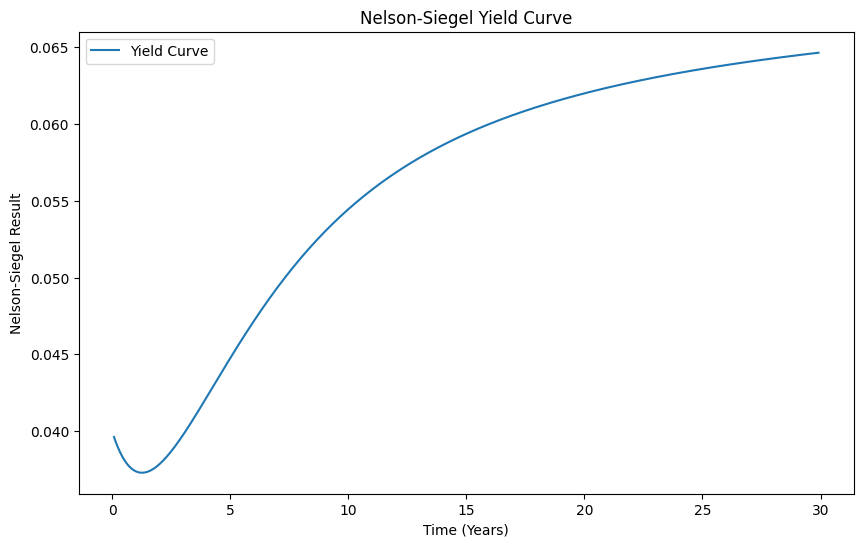

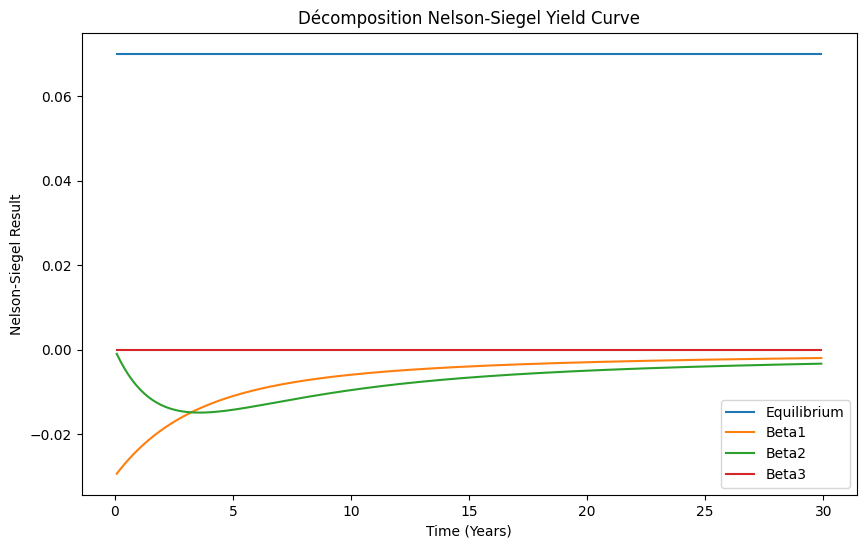

In [42]:
n_max = 30 * 12
# Define the data
data = {
    'beta0': [0.07, 0.07, 0.07, 0, 0, 0, 0.07],
    'beta1': [-0.03, 0.03, -0.03, 0, 0, 0, -0.03],
    'beta2': [0, 0, 0, -0.05, 0.05, -0.05, -0.05],
    'tau1': [2, 2, 9, 2, 2, 9, 2]
}

i = 6
data_params = [data[label][i] for label in list(data.keys())]
beta0, beta1, beta2, tau1  = data_params

obj = NelsonSiegelSvensson(data_params, n_max)
obj.plot_curve()

In [48]:
n = np.linspace(0, 30, 360)


360

In [4]:
# Creating the requested DataFrame
data = {
    'YTM': [0.039475, 0.042226, 0.043471, 0.044637, 0.047257, 0.044753],
    'TTM': [2, 4, 6, 9, 18, 30]
}

df_ytm_ttm = pd.DataFrame(data)

df_ytm_ttm

,YTM,TTM
0,0.039475,2
1,0.042226,4
2,0.043471,6
3,0.044637,9
4,0.047257,18
5,0.044753,30


In [49]:
# Objective function to minimize
from scipy.optimize import minimize

# Create function
class Exercice2:
    def __init__(self, mode_Nelson : bool = True):
        self.mode = mode_Nelson
    
    def nelsonsiegel(self, n, beta0, beta1, beta2, tau1):

        return beta0 + beta1 * (1- math.exp(-n/tau1)) / (n / tau1) + beta2 *(((1- math.exp(-n/tau1)) / (n / tau1))  - math.exp(-n / tau1))
    
    def svensson(self, n, beta0, beta1, beta2, beta3, tau1, tau2):

        return beta0 + beta1 * (1- math.exp(-n/tau1)) / (n / tau1) + beta2 *(((1- math.exp(-n/tau1)) / (n / tau1))  - math.exp(-n / tau1)) + beta3 *(((1- math.exp(-n/tau2)) / (n / tau2))  - math.exp(-n / tau2))
        
    def objective_function(self, params, ytm, ttm):
        if self.mode:
            beta0, beta1, beta2, tau1 = params
            predicted_ytm = np.array([self.nelsonsiegel(n, beta0, beta1, beta2, tau1) for n in ttm])
            return np.sum((ytm - predicted_ytm) ** 2)
        
        else:
            beta0, beta1, beta2, beta3, tau1, tau2 = params
            
            predicted_ytm = np.array([self.svensson(n, beta0, beta1, beta2, beta3, tau1, tau2) for n in ttm])
            return np.sum((ytm - predicted_ytm) ** 2)
    
    def main(self, ytm_data, ttm_data):
                # Initial guesses for parameters
        if self.mode:
            initial_params = [0.03, -0.02, 0.01, 1]  # These are just example initial guesses
        else:
            initial_params = [0.03, -0.02, 0.01, 1, 0.3, 0.2]  # These are just example initial guesses
        # Run the optimization
        result = minimize(self.objective_function, initial_params, args=(ytm_data, ttm_data))
        
        return result


## Exercice 2 - Paramètre estimé 

[0.04669028731685836, -0.01323118559445018, -0.005079839663306477, 0.9999378291016418]


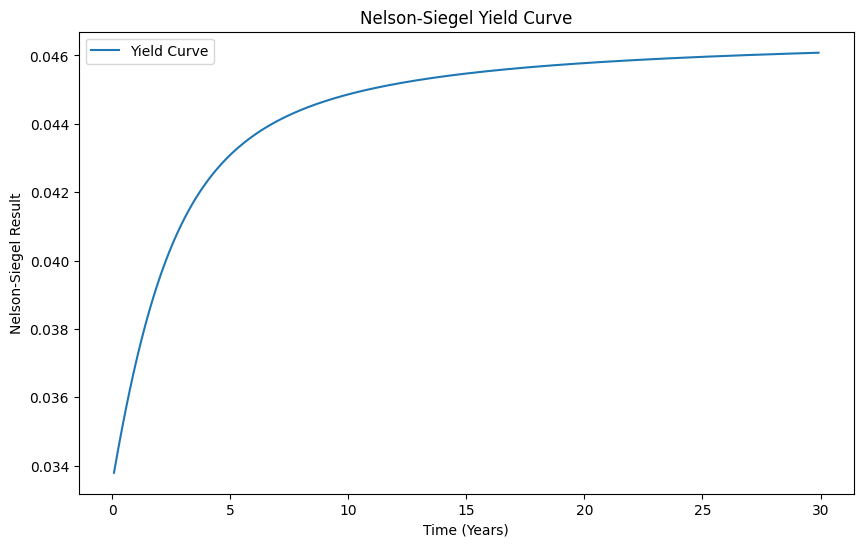

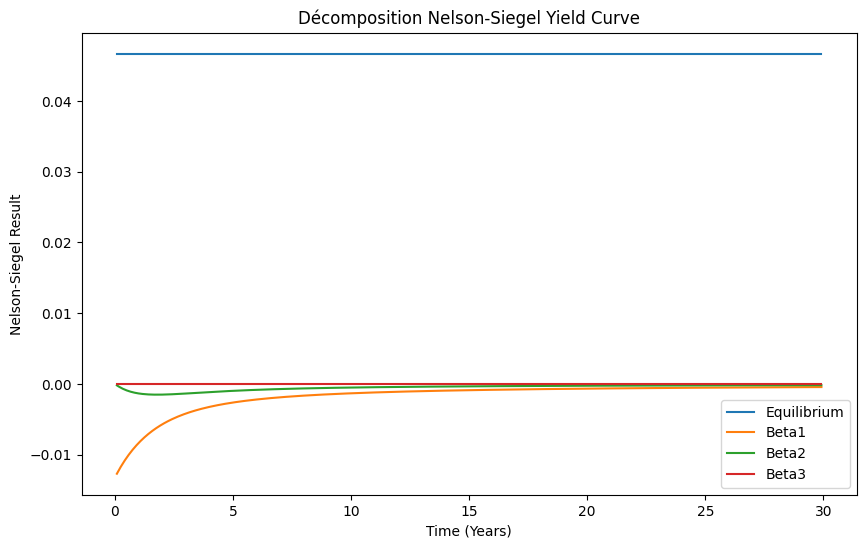

In [56]:
# Creating the requested DataFrame
data = {
    'YTM': [0.039475, 0.042226, 0.043471, 0.044637, 0.047257, 0.044753],
    'TTM': [2, 4, 6, 9, 18, 30]
}

df_ytm_ttm = pd.DataFrame(data)

# YTM and TTM data from your DataFrame
ytm_data = df_ytm_ttm['YTM'].values
ttm_data = df_ytm_ttm['TTM'].values


# Run the optimization
result = Exercice2(mode_Nelson=True)
l = result.main(ytm_data, ttm_data)
# The optimal parameters
df = [x for x in l.x] 
print(df)
obj = NelsonSiegelSvensson(df, n_max)
obj.plot_curve()

Text(0, 0.5, 'Yield to Maturity')

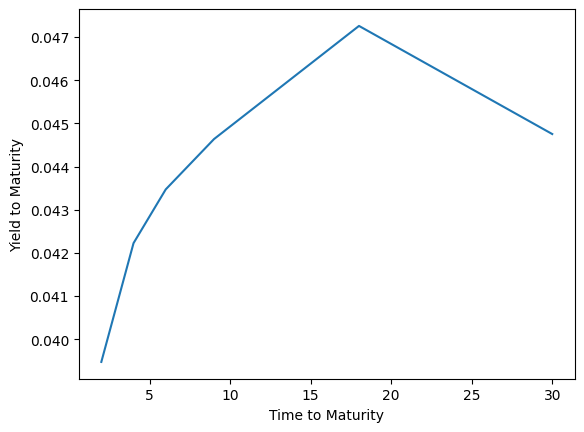

In [55]:
# Plotting the data
plt.plot(ttm_data, ytm_data)  # Note: positional arguments, not keywords

# Labeling the axes
plt.xlabel('Time to Maturity')
plt.ylabel('Yield to Maturity')

## Exercice 3 - À l'aide des prix
